In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
costumers_data = pd.read_csv(r"./dataset/Customers.csv")
transaction_data = pd.read_csv(r"./dataset/Transactions.csv")
product_data = pd.read_csv(r"./dataset/Products.csv")
costumers_data,transaction_data,product_data

(    CustomerID        CustomerName         Region  SignupDate
 0        C0001    Lawrence Carroll  South America  2022-07-10
 1        C0002      Elizabeth Lutz           Asia  2022-02-13
 2        C0003      Michael Rivera  South America  2024-03-07
 3        C0004  Kathleen Rodriguez  South America  2022-10-09
 4        C0005         Laura Weber           Asia  2022-08-15
 ..         ...                 ...            ...         ...
 195      C0196         Laura Watts         Europe  2022-06-07
 196      C0197    Christina Harvey         Europe  2023-03-21
 197      C0198         Rebecca Ray         Europe  2022-02-27
 198      C0199      Andrea Jenkins         Europe  2022-12-03
 199      C0200         Kelly Cross           Asia  2023-06-11
 
 [200 rows x 4 columns],
     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0          T00001      C0199      P067  2024-08-25 12:38:23         1   
 1          T00112      C0146      P067  2024-05-27 22:23:54         

In [29]:
# Checking for missing values in each dataset
missing_customers = costumers_data.isnull().sum()
missing_products = product_data.isnull().sum()
missing_transactions = transaction_data.isnull().sum()

# Checking data types and duplicates
customers_info = costumers_data.info()
products_info = product_data.info()
transactions_info = transaction_data.info()

duplicates_customers = costumers_data.duplicated().sum()
duplicates_products = product_data.duplicated().sum()
duplicates_transactions = transaction_data.duplicated().sum()

missing_customers, missing_products, missing_transactions, duplicates_customers, duplicates_products, duplicates_transactions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64,
 0,
 0,
 0)

In [30]:
# Convert date to datetime format
costumers_data['SignupDate'] = pd.to_datetime(costumers_data['SignupDate'])
transaction_data['TransactionDate'] = pd.to_datetime(transaction_data['TransactionDate'])

costumers_data.info(), transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Pri

(None, None)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6296\1757387958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')


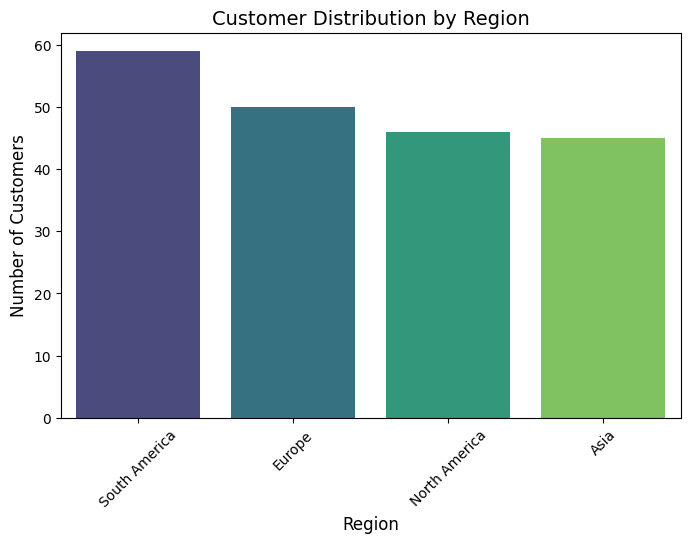

In [31]:
# Customer distribution by region
region_distribution = costumers_data['Region'].value_counts()

# Plotting region distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

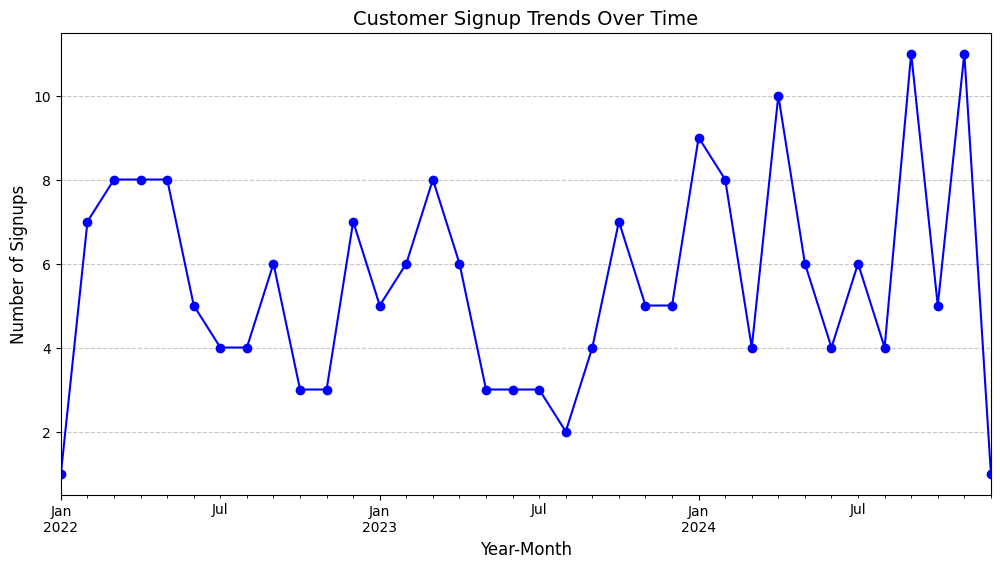

In [32]:
# Customer signup trends over time
costumers_data['SignupYearMonth'] = costumers_data['SignupDate'].dt.to_period('M')
signup_trends = costumers_data['SignupYearMonth'].value_counts().sort_index()

# Plotting signup trends
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Customer Signup Trends Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

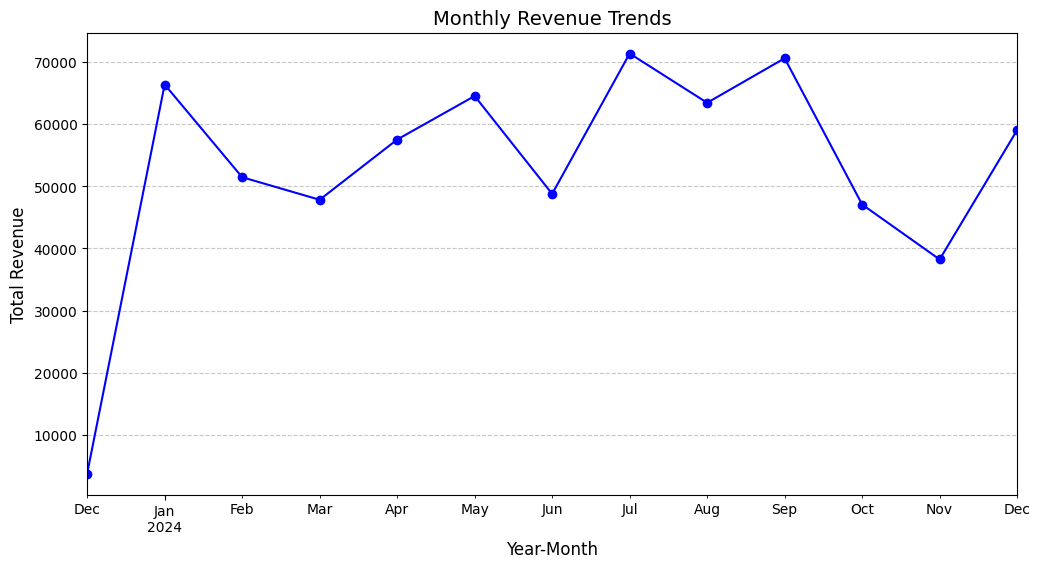

In [33]:
# Group transactions by year-month
transaction_data['YearMonth'] = transaction_data['TransactionDate'].dt.to_period('M')
monthly_revenue = transaction_data.groupby('YearMonth')['TotalValue'].sum()

# Plot monthly revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title('Monthly Revenue Trends', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6296\1371311658.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='mako')


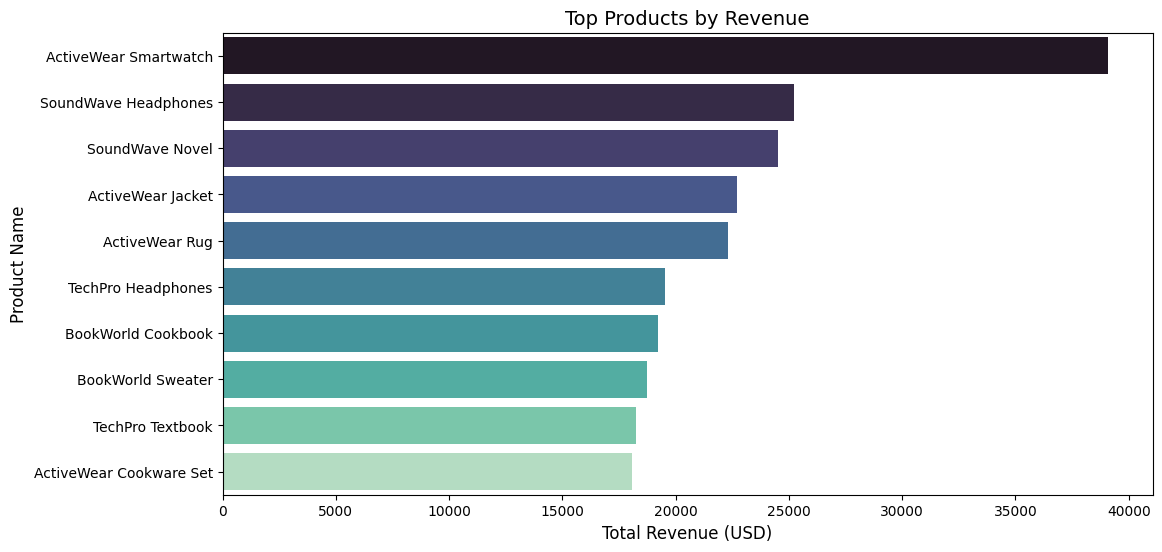

In [34]:
# Merge transactions with products
transactions_products = transaction_data.merge(product_data, on='ProductID')

# Top products by quantity sold
top_products_qty = transactions_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top products by revenue
top_products_revenue = transactions_products.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plot top products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='mako')
plt.title('Top Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6296\849278191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')


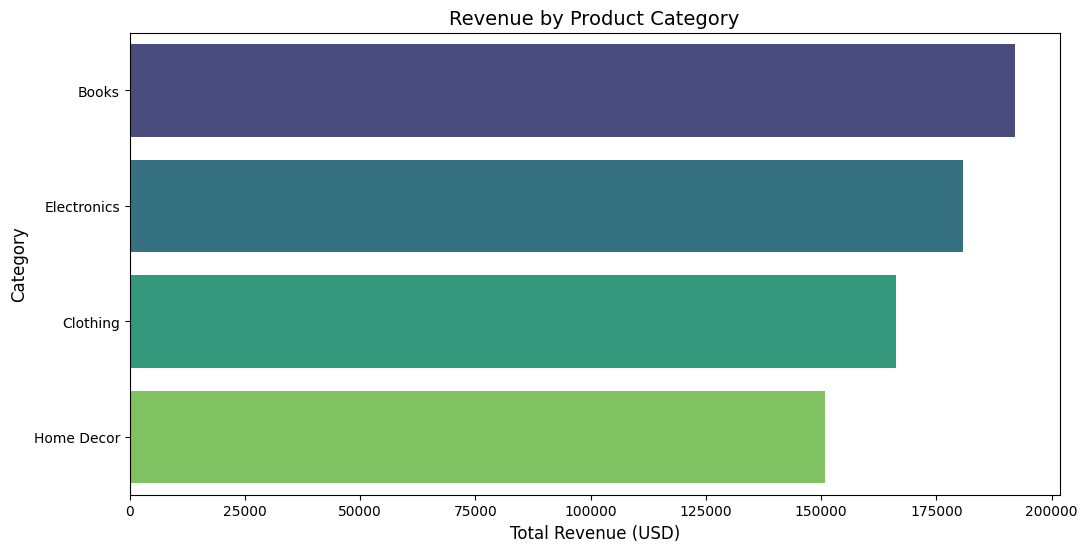

In [35]:
# Most profitable categories
category_revenue = transactions_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6296\3201320035.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_revenue.values, y=regional_revenue.index, palette='coolwarm')


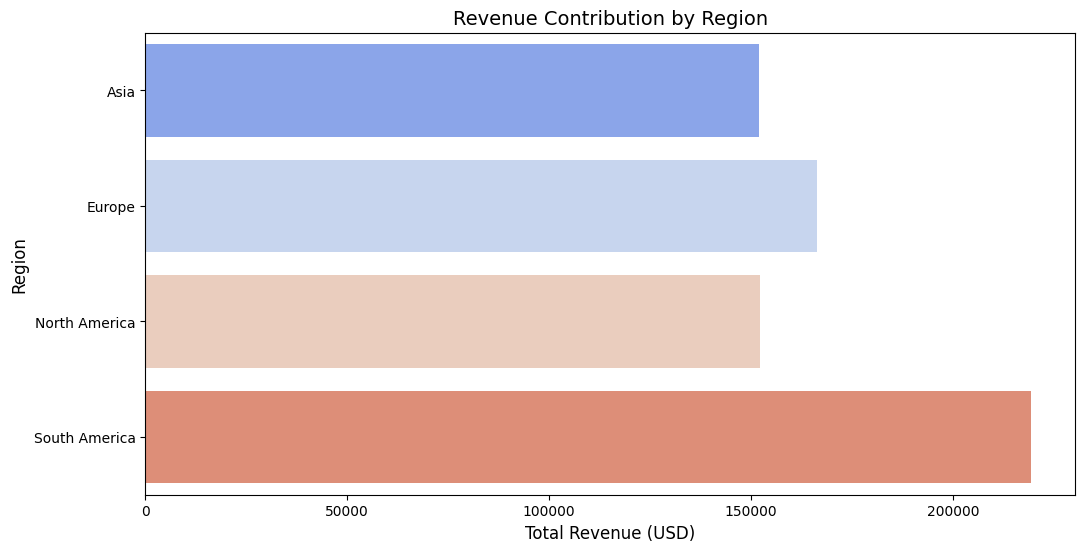

In [36]:
# Average purchase value per customer
avg_purchase_per_customer = transaction_data.groupby('CustomerID')['TotalValue'].mean()

# High-value customers (Top 10 by total spend)
customer_total_spend = transaction_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Regional revenue contribution
regional_revenue = transactions_products.merge(costumers_data, on='CustomerID').groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=regional_revenue.values, y=regional_revenue.index, palette='coolwarm')
plt.title('Revenue Contribution by Region', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

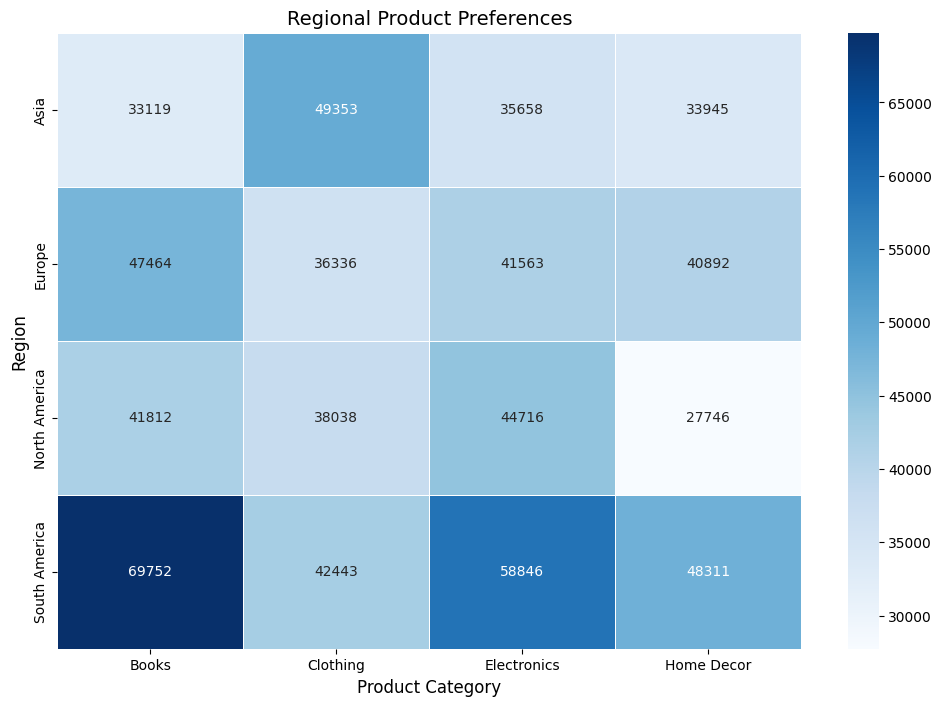

In [37]:
# Regional product preferences
regional_preferences = transactions_products.merge(costumers_data, on='CustomerID').groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

# Heatmap of regional product preferences
plt.figure(figsize=(12, 8))
sns.heatmap(regional_preferences, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)
plt.title('Regional Product Preferences', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

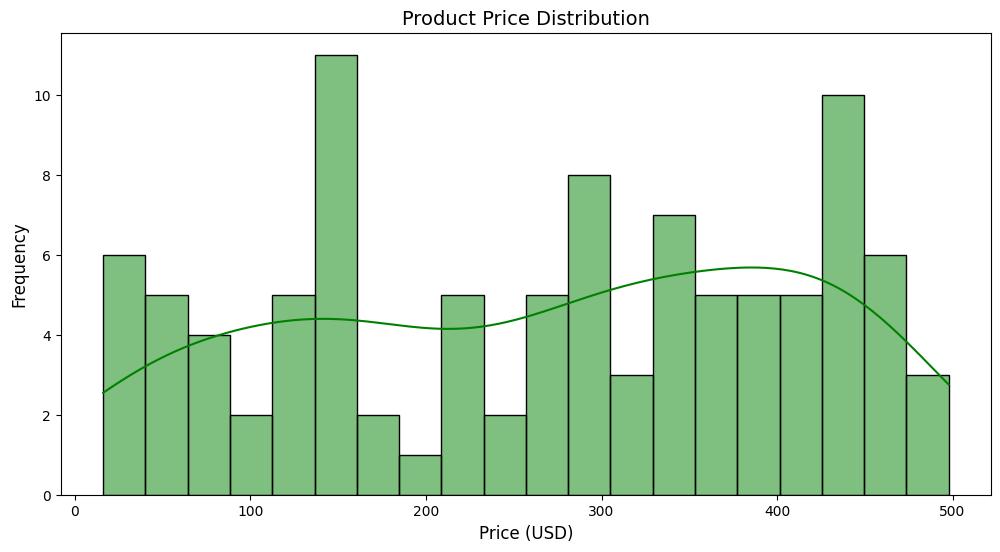

In [38]:
#  Price Analysis 
# Distribution of product prices
plt.figure(figsize=(12, 6))
sns.histplot(product_data['Price'], bins=20, kde=True, color='green')
plt.title('Product Price Distribution', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6296\673650386.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_performance = transactions_products.groupby('PriceRange')['Quantity'].sum()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_6296\673650386.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_performance.index, y=price_range_performance.values, palette='cubehelix')


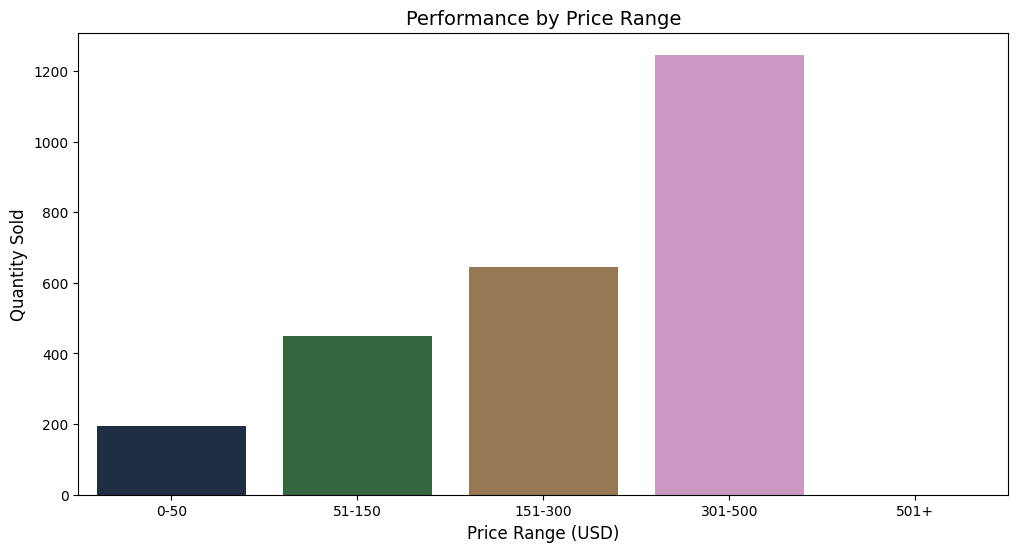

In [39]:
# Performance of price ranges
transactions_products['PriceRange'] = pd.cut(transactions_products['Price_x'], bins=[0, 50, 150, 300, 500, 1000],
                                             labels=['0-50', '51-150', '151-300', '301-500', '501+'])
price_range_performance = transactions_products.groupby('PriceRange')['Quantity'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=price_range_performance.index, y=price_range_performance.values, palette='cubehelix')
plt.title('Performance by Price Range', fontsize=14)
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.show()